In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

2024-08-09 10:40:44.028245: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 10:40:44.030590: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-09 10:40:44.037909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 10:40:44.050092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 10:40:44.054613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-09 10:40:44.063256: I tensorflow/core/platform/cpu_feature_gu

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/home/user/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [4]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))


2024-08-09 10:41:01.471531: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3553 - loss: 1.7494

2024-08-09 10:41:23.827147: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3554 - loss: 1.7491 - val_accuracy: 0.5578 - val_loss: 1.2346
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5896 - loss: 1.1634 - val_accuracy: 0.6333 - val_loss: 1.0323
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6532 - loss: 0.9785 - val_accuracy: 0.6688 - val_loss: 0.9451
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.6917 - loss: 0.8766 - val_accuracy: 0.6883 - val_loss: 0.8953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7184 - loss: 0.8028 - val_accuracy: 0.6941 - val_loss: 0.8938
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7421 - loss: 0.7362 - val_accuracy: 0.7016 - val_loss: 0.8790
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7627 - loss: 0.6793 - val_accuracy: 0.7070 - val_loss: 0.8626
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7783 - loss: 0.63

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

2024-08-09 10:44:07.058556: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 - 1s - 2ms/step - accuracy: 0.7148 - loss: 0.8753

Test accuracy: 0.7148000001907349


In [6]:
predictions = model.predict(x_test)
print(predictions[0]) 

 49/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2024-08-09 10:44:09.903542: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7.0032617e-04 1.8128155e-04 6.3137733e-03 8.2490778e-01 6.6656750e-05
 9.6675336e-02 7.0020877e-02 1.1629652e-05 1.0511441e-03 7.1214577e-05]


In [8]:
model.save('Object_Recognition_DIYA1.keras')

Current directory contents:
['pit.gif', 'Untitled.ipynb', 'Untitled4.ipynb', 'Untitled3.ipynb', 'Anaconda3-2024.02-1-Linux-x86_64.sh', 'RANDOM WALK.ipynb', 'Screenshot 2024-07-12 at 13-21-38 rhjk.png', 'Object_Recognition_DIYA..keras', 'RandomWalk.ipynb', "Jack's car problem using policy iteration.ipynb", 'img1.jpg', 'AD22511- IOT LAB MANUAL.pdf', 'Gamblers_problem_value_iteration.ipynb', 'Untitled2.ipynb', 'Object_Recognition_DIYA1.keras', 'rand_walk100.png', 'RandomWalk.gif', 'shri1.ipynb', 'Untitled5.ipynb', 'Untitled1.ipynb', '.ipynb_checkpoints']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class index: 9
Predicted class name: car
Confidence: 0.9999


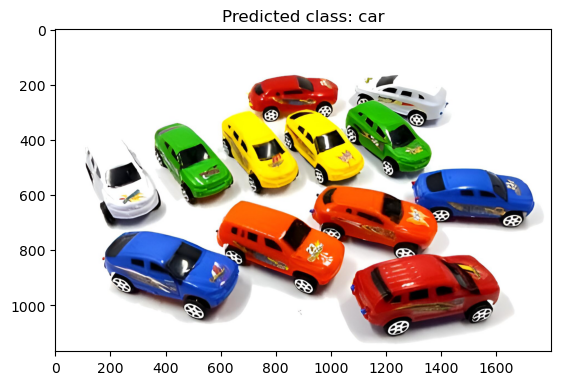

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

print("Current directory contents:")
print(os.listdir('.'))

try:
    model = tf.keras.models.load_model('Object_Recognition_DIYA1.keras')
except FileNotFoundError as e:
    print(f"Error loading model: {e}")
    exit()

def preprocess_image(img_path):
    try:
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0
        return img_array
    except Exception as e:
        print(f"Error preprocessing image: {e}")
        return None

def predict_image(img_path):
    img_array = preprocess_image(img_path)
    if img_array is None:
        print("Image preprocessing failed.")
        return None, None

    try:
        predictions = model.predict(img_array)
        class_idx = np.argmax(predictions[0])
        confidence = predictions[0][class_idx]
        return class_idx, confidence
    except Exception as e:
        print(f"Error making predictions: {e}")
        return None, None

if __name__ == "__main__":
    img_path = '/home/user/Downloads/img1.jpg'
    if not os.path.exists(img_path):
        print(f"Image file not found: {img_path}")
        exit()

    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'car']

    class_idx, confidence = predict_image(img_path)
    if class_idx is not None:
        print(f'Predicted class index: {class_idx}')
        print(f'Predicted class name: {class_names[class_idx]}')
        print(f'Confidence: {confidence:.4f}')
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.title(f'Predicted class: {class_names[class_idx]}')
        plt.show()
    else:
        print("Prediction failed.")
